<div style="text-align: center;" >
<h1 style="margin-top: 0.2em; margin-bottom: 0.1em;">Introduction to Computation for the Social Sciences</h1>
<h2 style="margin-top: 0.7em; margin-bottom: 0.3em;">Assignment 1</h2>
<h3 style="margin-top: 0.7em; margin-bottom: 0.3em;">Deadline Part 1: Oct 29, 23:59</h3>
<h3 style="margin-top: 0.7em; margin-bottom: 0.3em;">Deadline Parts 2-4: Nov 10, 23:59</h3>

</div>
<br>

<h4 style="margin-top: 0.7em; margin-bottom: 0.3em; font-style:italic">
Please push your solutions to your personal repository in our <a href='https://classroom.github.com/a/tGD_7t85'>GitHub Classroom</a></h4><br>

***

<h3>Part 1 - GitHub Setup</h3>


If you got this second part, the first part of the assignment obviously worked. Well done!

***

<h1>Deadline for the following Parts (2-4) is November 10, 2024</h1>

<h3>Part 2 - Pandas Data Frames and Data Visualization</h3>

<h4>Task 5</h4>

***a) Import the csv-file on world population***

In the Git Hub, where you pulled the assignment, you were also provided two csv-files. Please import the file on world population and store it as a data frame. Remember to load the pandas library first. 

In [9]:
# Import first data set

import pandas as pd

wrld_pop = pd.read_csv("world-population-by-country-2020.csv")

***b) Data Types***

Familiarize yourself with the data on world population per country. 

Often, it might be useful to rename some columns or change the data type of values.
Therefore, investigate what data types do the different columns have.


In [10]:
# Checking data types

wrld_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   no                       235 non-null    int64 
 1   Country (or dependency)  235 non-null    object
 2   Population 2020          235 non-null    object
 3   Yearly Change            235 non-null    object
 4   Net Change               235 non-null    object
 5   Density  (P/Km²)         235 non-null    object
 6   Land Area (Km²)          235 non-null    object
 7   Migrants (net)           201 non-null    object
 8   Fert. Rate               235 non-null    object
 9   Med. Age                 235 non-null    object
 10  Urban Pop %              235 non-null    object
 11  World Share              235 non-null    object
dtypes: int64(1), object(11)
memory usage: 22.2+ KB


Rename the columns using the following dictionary:

`{'no' : 'Nr.', 'Country (or dependency)' : 'Country', 'Population 2020' : 'Population', 'Yearly Change' : 'Yearly_%_Change',
'Net Change' : 'Net_Change', 'Density  (P/Km²)' : 'Density', 'Land Area (Km²)' : 'Area', 'Migrants (net)' : 'Net_Migrants',
'Fert. Rate' : 'Fert_Rate', 'Med. Age' : 'Median_Age', 'Urban Pop %' : 'Urban_Pop_%', 'World Share' : 'World_Share'}`

In [11]:
# Renaming columns

wrld_pop.rename({'no' : 'Nr.', 'Country (or dependency)' : 'Country', 'Population 2020' : 'Population', 'Yearly Change' : 'Yearly_%_Change',
'Net Change' : 'Net_Change', 'Density  (P/Km²)' : 'Density', 'Land Area (Km²)' : 'Area', 'Migrants (net)' : 'Net_Migrants',
'Fert. Rate' : 'Fert_Rate', 'Med. Age' : 'Median_Age', 'Urban Pop %' : 'Urban_Pop_%', 'World Share' : 'World_Share'}, inplace=True)

***c) Filter out all counties, that have missing values somewhere in the table. Do they contribute a relevant share to the world-population? If not, simply drop these rows (countires)***


In [12]:
# Deal with NA-rows
## The string "N.A." is not automatically recognized as NA. Thus, I declare it as such manually.
wrld_pop=wrld_pop.replace("N.A.", pd.NA)
## Filtering and printing the sum of countries with NAs.
print(wrld_pop.isna().any(axis=1).sum(), "of 235 countries have NA. This share is relatively small and can be dropped.")
## Dropping NAs
wrld_pop.dropna(inplace=True)

wrld_pop


41 of 235 countries have NA. This share is relatively small and can be dropped.


,no,Country (or dependency),Population 2020,Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,1,China,"1,439,323,776",0.39%,"5,540,090",153,"9,388,211","-348,399",1.7,38,61%,18.47%
1,2,India,"1,380,004,385",0.99%,"13,586,631",464,"2,973,190","-532,687",2.2,28,35%,17.70%
2,3,United States,"331,002,651",0.59%,"1,937,734",36,"9,147,420","954,806",1.8,38,83%,4.25%
3,4,Indonesia,"273,523,615",1.07%,"2,898,047",151,"1,811,570","-98,955",2.3,30,56%,3.51%
4,5,Pakistan,"220,892,340",2.00%,"4,327,022",287,"770,880","-233,379",3.6,23,35%,2.83%
...,...,...,...,...,...,...,...,...,...,...,...,...
196,197,Aruba,"106,766",0.43%,452,593,180,201,1.9,41,44%,0.00%
197,198,Tonga,"105,695",1.15%,"1,201",147,720,-800,3.6,22,24%,0.00%
198,199,U.S. Virgin Islands,"104,425",-0.15%,-153,298,350,-451,2,43,96%,0.00%
199,200,Seychelles,"98,347",0.62%,608,214,460,-200,2.5,34,56%,0.00%


***d) Change the data type of all numeric columns to int (or float). Find a way to deal with the percentage-columns and comma.***


In [13]:
# Changing data types

## This approach is handy, yet it works.

## Handling percentages
wrld_pop["Yearly Change"]=wrld_pop["Yearly Change"].str.replace("%","").astype(float).divide(100)
wrld_pop["Urban Pop %"]=wrld_pop["Urban Pop %"].str.replace("%","").astype(float).divide(100)
wrld_pop["World Share"]=wrld_pop["World Share"].str.replace("%","").astype(float).divide(100)

## Handling comma
wrld_pop["Population 2020"]=wrld_pop["Population 2020"].str.replace(",","").astype(float)
wrld_pop["Net Change"]=wrld_pop["Net Change"].str.replace(",","").astype(float)
wrld_pop["Density  (P/Km²)"]=wrld_pop["Density  (P/Km²)"].str.replace(",","").astype(float)
wrld_pop["Land Area (Km²)"]=wrld_pop["Land Area (Km²)"].str.replace(",","").astype(float)
wrld_pop["Migrants (net)"]=wrld_pop["Migrants (net)"].str.replace(",","").astype(float)

## The rest
wrld_pop["Med. Age"]=wrld_pop["Med. Age"].astype(float)
wrld_pop["Fert. Rate"]=wrld_pop["Fert. Rate"].astype(float)
wrld_pop["no"]=wrld_pop["no"].astype(float)


wrld_pop.dtypes


no                         float64
Country (or dependency)     object
Population 2020            float64
Yearly Change              float64
Net Change                 float64
Density  (P/Km²)           float64
Land Area (Km²)            float64
Migrants (net)             float64
Fert. Rate                 float64
Med. Age                   float64
Urban Pop %                float64
World Share                float64
dtype: object

***e) Import the second csv-file containing countries, their capital and continent. For nice visualisations later, please merge the information on continents on to your population-data-frame.***

*Hint: use the pandas function `.merge()` and see the documentation [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html) for details*.

In [14]:
# Merging Data Frames
## Reading the csv after re-coding some errorenous symbols by hand
ccc = pd.read_csv("countries-continents-capitals.csv", encoding="utf-8")
## Merging
wrld_pop=wrld_pop.merge(ccc, left_on="Country (or dependency)", right_on="Country/Territory", how ="left").drop(columns=["Country/Territory"])
wrld_pop

,no,Country (or dependency),Population 2020,Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share,Capital,Continent
0,1.0,China,1.439324e+09,0.0039,5540090.0,153.0,9388211.0,-348399.0,1.7,38.0,0.61,0.1847,Beijing,Asia
1,2.0,India,1.380004e+09,0.0099,13586631.0,464.0,2973190.0,-532687.0,2.2,28.0,0.35,0.1770,New Delhi,Asia
2,3.0,United States,3.310027e+08,0.0059,1937734.0,36.0,9147420.0,954806.0,1.8,38.0,0.83,0.0425,"Washington, D.C.",North America
3,4.0,Indonesia,2.735236e+08,0.0107,2898047.0,151.0,1811570.0,-98955.0,2.3,30.0,0.56,0.0351,Jakarta,Asia
4,5.0,Pakistan,2.208923e+08,0.0200,4327022.0,287.0,770880.0,-233379.0,3.6,23.0,0.35,0.0283,Islamabad,Asia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,197.0,Aruba,1.067660e+05,0.0043,452.0,593.0,180.0,201.0,1.9,41.0,0.44,0.0000,Oranjestad,North America
190,198.0,Tonga,1.056950e+05,0.0115,1201.0,147.0,720.0,-800.0,3.6,22.0,0.24,0.0000,Nuku'alofa,Oceania
191,199.0,U.S. Virgin Islands,1.044250e+05,-0.0015,-153.0,298.0,350.0,-451.0,2.0,43.0,0.96,0.0000,NaN,NaN
192,200.0,Seychelles,9.834700e+04,0.0062,608.0,214.0,460.0,-200.0,2.5,34.0,0.56,0.0000,Victoria,Africa


***f) For some basic descriptive statistics, please find the following countries:***

- *Top 5* countries in absolute population numbers
- The country with the *highest* population density
- The counrty with the *highest* and *lowest* yearly %-change

In [15]:
# 1. top 5

wrld_pop.sort_values("Population 2020", ascending= False).head(5)


,no,Country (or dependency),Population 2020,Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share,Capital,Continent
0,1.0,China,1.439324e+09,0.0039,5540090.0,153.0,9388211.0,-348399.0,1.7,38.0,0.61,0.1847,Beijing,Asia
1,2.0,India,1.380004e+09,0.0099,13586631.0,464.0,2973190.0,-532687.0,2.2,28.0,0.35,0.1770,New Delhi,Asia
2,3.0,United States,3.310027e+08,0.0059,1937734.0,36.0,9147420.0,954806.0,1.8,38.0,0.83,0.0425,"Washington, D.C.",North America
3,4.0,Indonesia,2.735236e+08,0.0107,2898047.0,151.0,1811570.0,-98955.0,2.3,30.0,0.56,0.0351,Jakarta,Asia
4,5.0,Pakistan,2.208923e+08,0.0200,4327022.0,287.0,770880.0,-233379.0,3.6,23.0,0.35,0.0283,Islamabad,Asia


In [16]:
# 2. max()
wrld_pop[wrld_pop["Density  (P/Km²)"]==wrld_pop["Density  (P/Km²)"].max()]

,no,Country (or dependency),Population 2020,Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share,Capital,Continent
146,152.0,Bahrain,1701575.0,0.0368,60403.0,2239.0,760.0,47800.0,2.0,32.0,0.89,0.0002,Manama,Asia


In [17]:
# 3. max() and min()

wrld_pop[(wrld_pop["Yearly Change"]==wrld_pop["Yearly Change"].max()) | (wrld_pop["Yearly Change"]==wrld_pop["Yearly Change"].min()) ]

,no,Country (or dependency),Population 2020,Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share,Capital,Continent
54,56.0,Niger,24206644.0,0.0384,895929.0,19.0,1266700.0,4000.0,7.0,15.0,0.17,0.0031,Niamey,Africa
136,142.0,Lithuania,2722289.0,-0.0135,-37338.0,43.0,62674.0,-32780.0,1.7,45.0,0.71,0.0003,Vilnius,Europe


***g) Find the absolute population number, the mean population and %-share among the world-population, when grouping the countires on continent. Save the resulting table into a separate data frame.***
 

In [19]:
# Solution
continents=wrld_pop.groupby("Continent").agg(
    abs_pop = ("Population 2020", "sum"),
    mean_pop = ("Population 2020", "mean"),
    share_pop = ("World Share", "sum")
).reset_index()

continents


,Continent,abs_pop,mean_pop,share_pop
0,Africa,1.307025e+09,2.513510e+07,0.1676
1,Asia,4.616479e+09,1.025884e+08,0.5924
2,Europe,7.376036e+08,1.891291e+07,0.0946
3,North America,5.879094e+08,2.672316e+07,0.0755
4,Oceania,4.286727e+07,3.297482e+06,0.0053
5,South America,4.023203e+08,3.352670e+07,0.0516


***h) Plot the absolute population per continent in descending order, using a bar chart. Don't forget to add a header, axis-labels, a legend (if required) and so on.***
 

<Axes: title={'center': 'Absolute Population per Continent'}, xlabel='Continent', ylabel='Population in Billions (1e9)'>

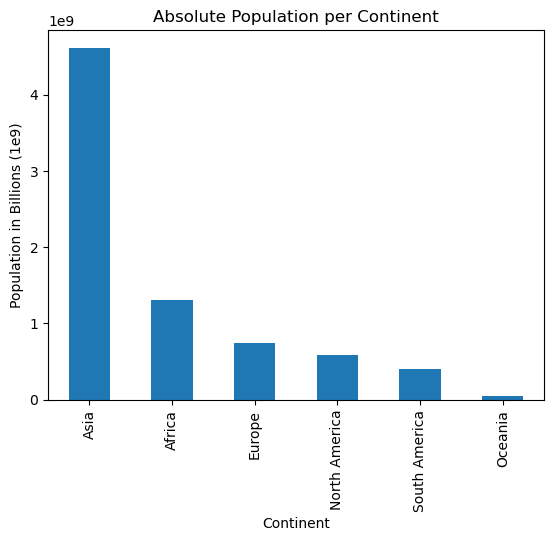

In [27]:
# Bar chart

continents.sort_values(by="abs_pop", ascending=False).plot(x="Continent", 
                                                           y="abs_pop",
                                                           kind='bar', 
                                                           xlabel="Continent",
                                                           ylabel="Population in Billions (1e9)",
                                                           title="Absolute Population per Continent",
                                                           legend=False)


***i) Visualize the distribution of the continents populations by using a violin plot (if you are not familiar with violin plots, read for example [here](https://mode.com/blog/violin-plot-examples/)). Describe your findings from the two plots in 2 - 3 sentences.***

C:\Users\User\AppData\Local\Temp\ipykernel_16036\1079449293.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  sns.violinplot(x='Continent', y='Population 2020', data=wrld_pop).set_xticklabels(["Asia", "North Am.", "South Am.", "Africa", "Europe", "Oceania"])
C:\Users\User\AppData\Local\Temp\ipykernel_16036\1079449293.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  sns.violinplot(x='Continent', y='Population 2020', data=wrld_pop).set_xticklabels(["Asia", "North Am.", "South Am.", "Africa", "Europe", "Oceania"])


Text(0, 0.5, 'Population in Hundred Millions (1e8)')

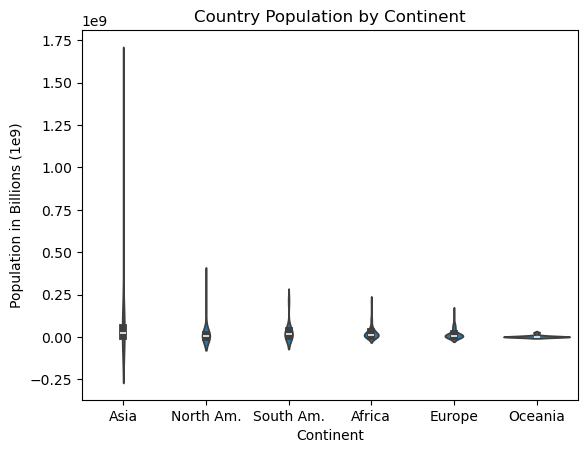

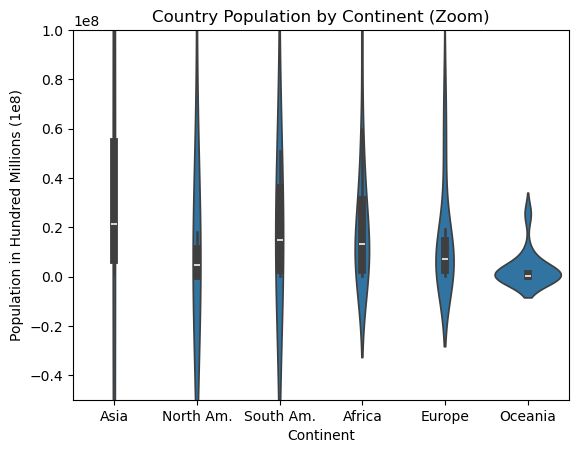

In [ ]:
# Violin plot
import seaborn as sns
import matplotlib.pyplot as plt

## Plotting figure without "zooming"
plt.figure()
sns.violinplot(x='Continent', y='Population 2020', data=wrld_pop).set_xticklabels(["Asia", "North Am.", "South Am.", "Africa", "Europe", "Oceania"])
plt.title("Country Population by Continent")
plt.ylabel("Population in Billions (1e9)")

## Plotting figure with "zooming" by limiting the y-axis to 1 billion and -500 million, respectively.
plt.figure()
sns.violinplot(x='Continent', y='Population 2020', data=wrld_pop).set_xticklabels(["Asia", "North Am.", "South Am.", "Africa", "Europe", "Oceania"])
plt.ylim(-0.05*10**9, 0.1*10**9)
plt.title("Country Population by Continent (Zoom)")
plt.ylabel("Population in Hundred Millions (1e8)")



***Interprete your plot here:***

- Asia contributes the largest share to the world’s population by a considerable margin, followed by Africa, Europe, North and South America, and finally Oceania. However, within Asia, there is a wide variation in population sizes among countries, ranging from very large to much smaller populations. In contrast, Africa, Europe, and Oceania exhibit a narrower distribution around the median population size. North and South America also display a broader range of population sizes across their countries, relative to their medians.

<h3>Part 3 - Lambda Functions and List/Dictionary Comprehension</h3>

<h4>Task 6</h4>

***a) Lambda Functions***

Lambda functions are a handy way to define small, helpful functions. The basic syntax was: 

`lambda <parameter>, … : expression`

Use a lambda function to obtain the dictionary representing the person closest to their 50th birthday from a list of dictionaries in the following form (if there are multiple people with the same distance, it is enough to return one):


In [21]:
people = [{'name': 'Laurie Pineda', 'age': 39}, {'name': 'Tommy Harper', 'age': 21}, 
                    {'name': 'Jeffery Short', 'age': 54}]

people  

[{'name': 'Laurie Pineda', 'age': 39},
 {'name': 'Tommy Harper', 'age': 21},
 {'name': 'Jeffery Short', 'age': 54}]

In [22]:
# Your solution can go here:

## Looking for the smallest difference of age to 50 in the people_list and putting people for which equals their own respective difference into a separate list of which the first (and only) item is returned.
birthday= lambda people_lst: [person for person in people_lst if abs(person["age"]-50) == min([abs(person["age"]-50) for person in people_lst])][0]
birthday(people)

{'name': 'Jeffery Short', 'age': 54}

***b) List Comprehension***

We’ve also learned about list comprehension. Here, the syntax was:
`L = [<element> for <element> in <list> if <Condition>]`

Use list comprehensions to write a Python function `remove_long_words()` that:
- accepts a sentence and an integer n as input parameters
- uses the split() function of String objects to split the sentence into words
- stores the individual words in a list
- removes all words that are longer than n characters from the list, thereby creating a new list (*hint:* here, you need to use the list comprehension )
- prints the new list

Make sure to include comments and a function description.

In [23]:
# Your solution can go here:
## Function remove_long_words recieves the string of a sentence and an integer size-criterion
## and returns a list of the words in the sentence that are not longer than the integer.

def remove_long_words(sentence, n):
    ### Splitting the words of the sentence into a list
    words=sentence.split()
    ### Filtering words according to the size-criterion by list comprehension
    short_words=[word for word in words if len(word)<=n]
    ### Returning the filtered list
    return(short_words)


remove_long_words("Pyrotechnik ist doch kein Verbrechen", 4)

['ist', 'doch', 'kein']

<h4>Task 7 - Social Science Application</h4>


***a) Senat Election Predictions***

In the GitHub folder for the first assignment, you will find a JSON file containing the US Senate 2022 Midterm Election predictions from fivethirtyeight.com

- Open and load the JSON file data into Python
- Using list/dictionary comprehension and lambda functions, extract the state-code, name and party affiliation of the candidate with the highest winning probability (``winprob``) in each state.

*Hints:*
- Start by printing one dictionary (for one state), to get an idea of the nested structure
    * Then, try to access each of the requested info for this first dictionary
    * When you have the correct info from the first dictionary, built the comprehension, to run over all dictionaries
- Ideally, you have one dictionary comprehension, running over all sub-dictionaries and extracting the desired information. Use a lambda-function to always find the candidate with the highest winning probability. 


In [24]:
# Your solution can go here:

import json
## Importing the data
with open("senate_predictions_11_08.json", "r") as read_file:
    senate_pred= json.load(read_file)

## Creating a lambda-function that checks the highest probability of winning for all candidates in a race and selects the name and party of the candidate for which this condition holds true.
max_prob=lambda race: [[cand["candidate"], cand["party"]] for cand in race["candidates"] if cand["winprob"] == max([cand["winprob"] for cand in race["candidates"]])][0]
## Creating a dictionary that assigns the candidate information selected by the previous function to the corresponding race
winprob={a["race"]:max_prob(a) for a in senate_pred["races"]}


len(winprob)



35

***b) Senat Election Results***

Additionally, you can find another JSON file with the (preliminary) US Senate Midterm Election results from “cnn.com”.
- Also, open and load this data
- Using a list/dictionary comprehension and lambda functions, extract the state-code, name and party affiliation of the winner in each state. 
    * Here, the same hints as in a) apply
- Compare the results from the prediction and the result. How many percent of the states were predicted correctly?

In [26]:
# Your solution can go here:

## Loading the data
with open("senate_results_11_10.json", "r") as read_file:
    senate_results= json.load(read_file)

## Similar procedure as above but with changed key-names and the selection condition being that the candidate has the highest vote percent.
winner=lambda race: [[cand["fullName"], cand["candidatePartyCode"]] for cand in race["candidates"] if float(cand["votePercentStr"]) == max(float(cand["votePercentStr"]) for cand in race["candidates"])][0]
win={str(a["stateAbbreviation"]+"-"+a["raceType"]):winner(a) for a in senate_results}

## Creating a boolean-list that checks if value for a key on index i is the same for both dictionaries
pred_list = [list(win.values())[i] == list(winprob.values())[i] for i in range(len(win))]

## Checking cases for which predictions were false
false_pred=zip(win.items(), winprob.items(), [not i for i in pred_list])

for item in false_pred:
    if item[2]==True:
        print(item)
## Some predictions were labeled as false because candidate names were spelled/noted differently in both dictonaries. I adjust this by hand.
winprob["NV-S3"]=win["NV-S"]
winprob["NY-S3"]=win["NY-S"]
winprob["OH-S3"]=win["OH-S"]
winprob["SD-S3"]=win["SD-S"]

## Finally, assessing the prediction accuracy.
print(sum(pred_list),"of",len(winprob),"states (",round(sum(pred_list)/len(winprob)*100, ndigits=1),"%) were predicted correctly.")


(('AK-S', ['Kelly Tshibaka', 'R']), ('AK-S3', ['Lisa Murkowski', 'R']), True)
(('GA-S', ['Raphael Warnock', 'D']), ('GA-S3', ['Herschel Junior Walker', 'R']), True)
(('PA-S', ['John Fetterman', 'D']), ('PA-S3', ['Mehmet Oz', 'R']), True)
32 of 35 states ( 91.4 %) were predicted correctly.


***

<h3>Part 4 - Bonus</h3>

In the lecture, you discussed an algorithm that converts integer numbers in decimal representation to binary representation. You may use any suitable data type as output as long as the resulting number is clearly identifiable.

***a) Number Conversion - Part 1***

Write a corresponding algorithm decimal_int_to_octal() in Python to convert non-negative integer numbers in decimal representation to octal.


In [27]:
def decimal_int_to_octal(numb):
    ## Creating an empty octal-list
    octal=[]
    ## Decimal-Octal-Algorithm
    while numb>0:
        item = numb % 8
        octal.append(item)
        numb= numb//8
    ## Reversing the list, joining the elements into a string and converting said string into an integer that is returned
    octal.reverse()
    octal=int("".join([str(i) for i in octal]))
    return octal
decimal_int_to_octal(245)

365

***b) Number Conversion - Part 2***

Develop a more general algorithm decimal_to_octal() that also converts numbers that include decimal places from decimal representation to octal.

In [28]:
def decimal_to_octal(numb):
    ## Octal list and separating integer from decimals
    octal=[]
    numb_int=int(numb)
    numb_decimal=numb-int(numb)

    ## Decimal-Octal-Algorithm for decimals
    while numb_decimal>0:
        item=int(numb_decimal*8)
        octal.append(item)
        numb_decimal=numb_decimal*8-item
    octal.reverse()
    
    ## Adding comma-dot
    octal.append(".")
    
    ## Same as above
    while numb_int>0:
        item = numb_int % 8
        octal.append(item)
        numb_int= numb_int//8

    octal.reverse()
    octal=float("".join([str(i) for i in octal]))
    return octal

decimal_to_octal(3124.4945)

6064.3751361523755

***c) Counting bits***

Write a program that counts the number of (non-zero) bits in a nonnegative integer. Do not use strings but bitwise operations (hint: Use bitshifts and masking).

In [ ]:
# No, thank you.